In [1]:
pip install beautifulsoup4


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install lxml 


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [12]:
pip install matplotlib seaborn pandas


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [2]:
import csv
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [3]:
url="https://www.jumia.sn/electronique/"
response = requests.get(url)
html = response.content
soup = BeautifulSoup(html, "lxml")



In [5]:
a = soup.find_all("a")


In [6]:
def generate_urls(base_url, total_pages):
    urls = [base_url]  
    for page in range(2, total_pages + 1): 
        urls.append(f"{base_url}?page={page}#catalog-listing")
    return urls

categories_urls = {
    'Téléphones & Tablettes': generate_urls("https://www.jumia.sn/telephone-tablette/", 50),
    'Electronique': generate_urls("https://www.jumia.sn/electronique/", 50),
    'Electroménager': generate_urls("https://www.jumia.sn/maison-bureau-electromenager/", 50),
    'Beauté & santé': generate_urls("https://www.jumia.sn/beaute-hygiene-sante/", 50),
    'Informatique': generate_urls("https://www.jumia.sn/ordinateurs-accessoires-informatique/", 50),
    'Mode': generate_urls("https://www.jumia.sn/fashion-mode/", 50),
    'Produits pour bébés': generate_urls("https://www.jumia.sn/bebe-puericulture/", 50),
    'Maison & Bureau': generate_urls("https://www.jumia.sn/maison-cuisine-jardin/", 50),
    'Sport & Loisir': generate_urls("https://www.jumia.sn/sports-loisirs/", 50),
    'Jeux vidéos & Console': generate_urls("https://www.jumia.sn/jeux-videos-consoles/", 50),
}



In [8]:
all_products = []

for category, urls in categories_urls.items():
    
    for url in urls:
        response = requests.get(url)
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # Extraire les produits pour chaque URL
        for product in soup.find_all('div', class_='info'):
            name = product.find('h3', class_='name').text.strip()
            price = product.find('div', class_='prc').text.strip()

            star_block = product.find('div', class_='rev')  
            if star_block:
                stars = star_block.find('div', class_='stars _s').text.strip().replace(' out of 5', '')
            else:
                stars = 'N/A'  

            all_products.append({
                'Nom': name,
                'Prix': price,
                'Catégorie': category,
                'Notes': stars
            })

df = pd.DataFrame(all_products)
print(df)
df.to_csv('jumia_products.csv', index=False, encoding='utf-8')

                                                     Nom         Prix  \
0      Tecno POP 9 – 64GB ROM + 3GB RAM – 5000mAh - N...  49 900 FCFA   
1      Generic GUIXIA  Tws Wireless Bluetooth Headset...   1 999 FCFA   
2      Music Pioneer Écouteur Bluetooth M10 V5.3 9D S...   2 100 FCFA   
3      Samsung Galaxy A05 - 4G - 6.7" - Ram 4Go, Rom ...  51 900 FCFA   
4      Generic GUIXIA  Pro3 In-ear Wireless Bluetooth...   2 099 FCFA   
...                                                  ...          ...   
16958                UBISOFT ALIENS : FIRETEAM ELITE PS5  40 000 FCFA   
16959              Techland Dying Light 2 Stay Human PS5  40 000 FCFA   
16960                Sony Manette PS3 DUALSHOCK3 - Blanc   6 200 FCFA   
16961              Sony Yakuza Like a Dragon Edition PS5  40 000 FCFA   
16962      Sony Werewolf : The Apocalypse Earthblood PS5  40 000 FCFA   

                    Catégorie Notes  
0      Téléphones & Tablettes   4.1  
1      Téléphones & Tablettes   3.7  
2      Té

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv('jumia_products.csv')


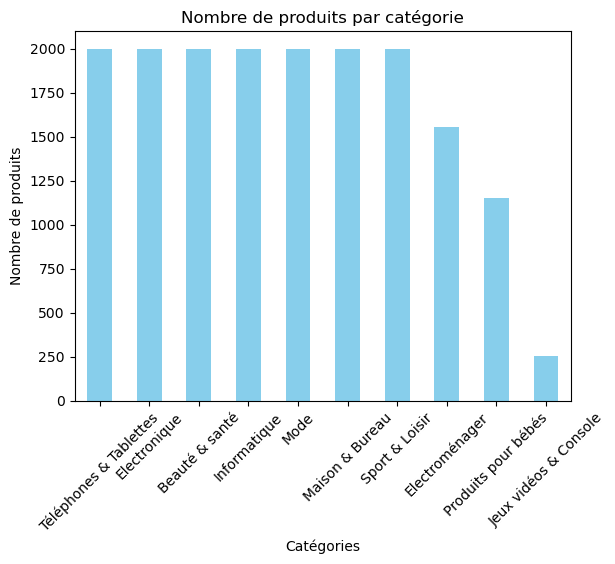

In [23]:
category_counts = df['Catégorie'].value_counts()

category_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de produits par catégorie')
plt.xlabel('Catégories')
plt.ylabel('Nombre de produits')
plt.xticks(rotation=45)
plt.show()


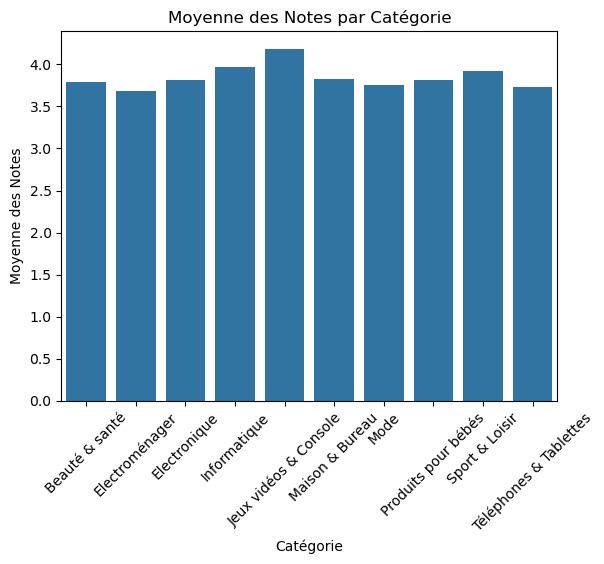

In [12]:

mean_ratings = df.groupby('Catégorie')['Notes'].mean().reset_index()

# Créer un diagramme en barres
sns.barplot(x='Catégorie', y='Notes', data=mean_ratings )
plt.title('Moyenne des Notes par Catégorie')
plt.xlabel('Catégorie')
plt.ylabel('Moyenne des Notes')
plt.xticks(rotation=45)
plt.show()


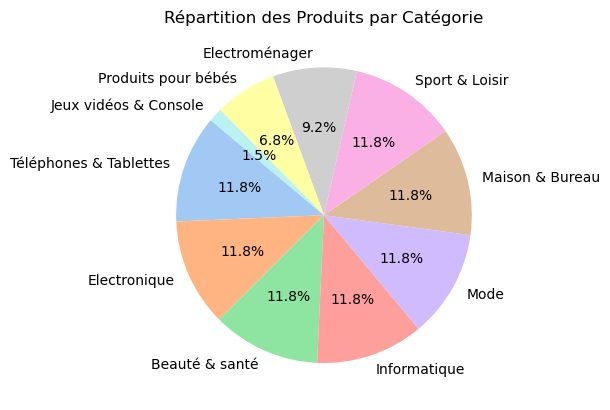

In [13]:
category_counts = df['Catégorie'].value_counts()

plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Répartition des Produits par Catégorie')
plt.show()


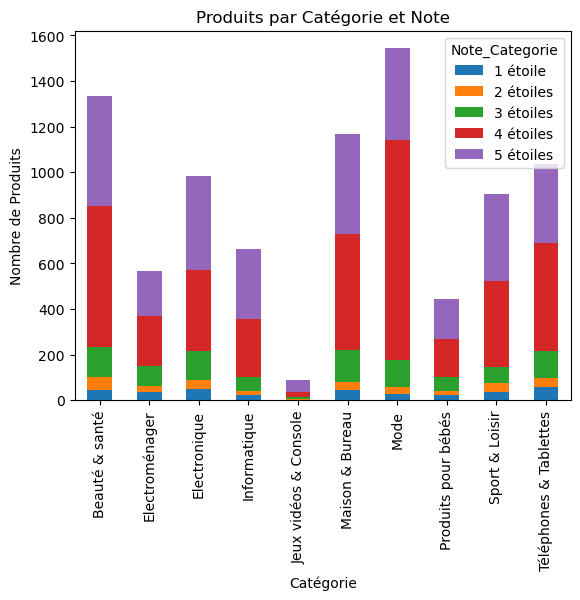

In [15]:
df['Note_Categorie'] = pd.cut(df['Notes'], bins=[0, 1, 2, 3, 4, 5], labels=['1 étoile', '2 étoiles', '3 étoiles', '4 étoiles', '5 étoiles'])

stacked_data = df.pivot_table(index='Catégorie', columns='Note_Categorie', aggfunc='size', fill_value=0, observed=False)

stacked_data.plot(kind='bar', stacked=True)
plt.title('Produits par Catégorie et Note')
plt.xlabel('Catégorie')
plt.ylabel('Nombre de Produits')
plt.show()


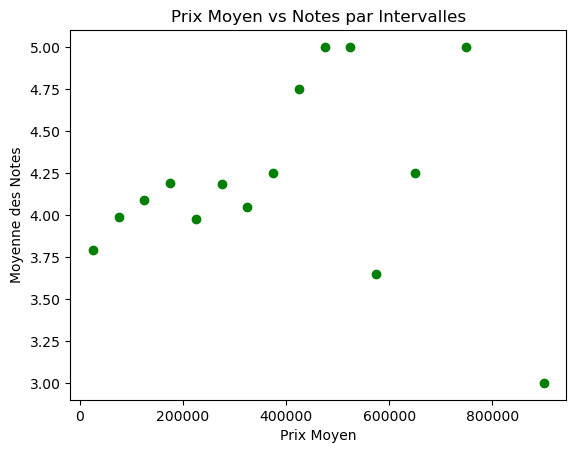

In [22]:

df['Prix'] = df['Prix'].replace(r'[^\d.]', '', regex=True).astype(float)
df['Notes'] = df['Notes'].replace('N/A', None).astype(float)

prix_bins = pd.cut(df['Prix'], bins=[0,50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000, 450000, 500000, 550000, 600000, 700000, 800000, 900000], right=False)

grouped = df.groupby(prix_bins,observed=False)['Notes'].mean().reset_index()
grouped['Prix_Moyen'] = grouped['Prix'].apply(lambda x: x.mid)  



plt.scatter(grouped['Prix_Moyen'], grouped['Notes'], color='green')
plt.title('Prix Moyen vs Notes par Intervalles')
plt.xlabel('Prix Moyen')
plt.ylabel('Moyenne des Notes')
plt.show()
